In [1]:
import pandas as pd

df_train = pd.read_csv("titanic_train.csv")
df_train = df_train[["pclass","sex","age","sibsp","parch","fare", "survived"]]
df_train.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,3,female,NaN,0,0,7.7333,1
1,3,male,38.0,0,0,8.6625,0
2,3,female,30.0,1,1,24.1500,0
3,2,female,54.0,1,3,23.0000,1
4,2,male,40.0,0,0,13.0000,0


In [2]:
df_train.isnull().any()

pclass      False
sex         False
age          True
sibsp       False
parch       False
fare         True
survived    False
dtype: bool

In [3]:
df_train.isna().any()

pclass      False
sex         False
age          True
sibsp       False
parch       False
fare         True
survived    False
dtype: bool

In [170]:
#preprocessing
from sklearn.preprocessing import LabelEncoder

df_train.dropna(inplace=True)
le = LabelEncoder()
df_train.sex = le.fit_transform(df_train.sex)#male: 1, female: 0
df_train.head()

,pclass,sex,age,sibsp,parch,fare,survived
1,3,1,38.0,0,0,8.6625,0
2,3,0,30.0,1,1,24.1500,0
3,2,0,54.0,1,3,23.0000,1
4,2,1,40.0,0,0,13.0000,0
5,3,1,28.0,0,0,22.5250,0


In [171]:
X = df_train[["pclass","sex","age","sibsp","parch","fare"]]
Y = df_train[["survived"]]

In [172]:
X.head()

,pclass,sex,age,sibsp,parch,fare
1,3,1,38.0,0,0,8.6625
2,3,0,30.0,1,1,24.1500
3,2,0,54.0,1,3,23.0000
4,2,1,40.0,0,0,13.0000
5,3,1,28.0,0,0,22.5250


In [173]:
Y.head()

,survived
1,0
2,0
3,1
4,0
5,0


In [174]:
print("Passenger Class Value Counts")
print(X.pclass.value_counts())
print("\nGender Value Counts\n")
print(X.sex.value_counts())
print("\nSibsp Value Counts\n")
print(X.sibsp.value_counts())
print("\nParch Value Counts\n")
print(X.parch.value_counts())


Passenger Class Value Counts
3    335
1    184
2    156
Name: pclass, dtype: int64

Gender Value Counts

1    429
0    246
Name: sex, dtype: int64

Sibsp Value Counts

0    433
1    192
2     21
4     14
3      9
5      5
8      1
Name: sibsp, dtype: int64

Parch Value Counts

0    499
1    106
2     59
4      4
3      3
5      3
6      1
Name: parch, dtype: int64


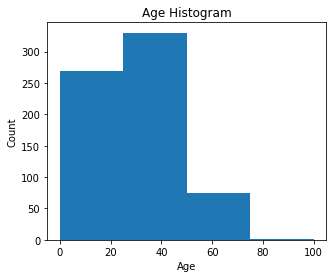

In [175]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize =(5, 4))
ax.hist(X.age, bins = [0, 25, 50, 75, 100])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Histogram")
plt.show()

## Decision Tree

In [176]:
#Normal Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 1)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [177]:
from sklearn.metrics import accuracy_score

print('Accuracy on train data: ', accuracy_score(y_true=y_train, y_pred=dt_clf.predict(X_train))*100)
print('Accuracy on test data: ', accuracy_score(y_true=y_test, y_pred=dt_clf.predict(X_test))*100)

Accuracy on train data:  98.02371541501977
Accuracy on test data:  78.10650887573965


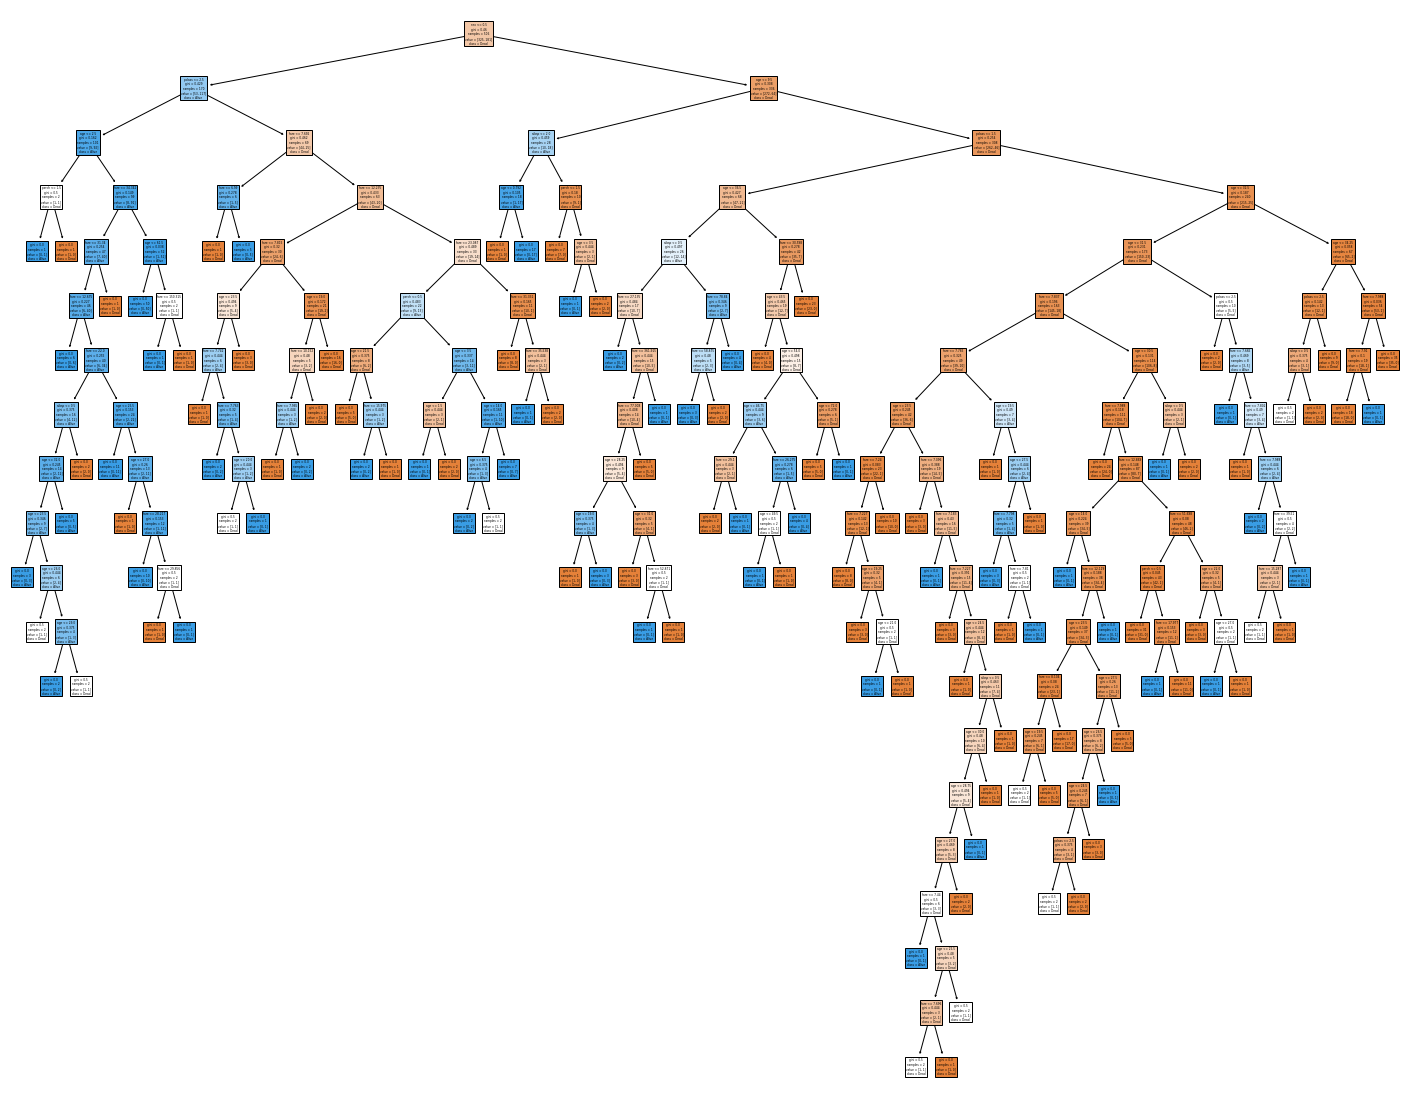

In [178]:
##visualization

from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_clf, feature_names=X.columns, class_names=["Dead", "Alive"], filled=True)
plt.show()

## K-Fold

In [179]:
from sklearn.model_selection import cross_val_score
import numpy as np

cross_val_scores = []
for i in range(2, 11):
    scores = cross_val_score(dt_clf, X, Y, cv = i)
    cross_val_scores.append(np.mean(scores))
    print("For K = ", i)
    print("The cross-validation scores using cross_val_score method are: \n{0}".format(scores))
    print("Mean of k-fold scores using cross_val_score method is: {0}".format(np.mean(scores)))
    print("------------------------------------------------------")

For K =  2
The cross-validation scores using cross_val_score method are: 
[0.78698225 0.72997033]
Mean of k-fold scores using cross_val_score method is: 0.7584762874651028
------------------------------------------------------
For K =  3
The cross-validation scores using cross_val_score method are: 
[0.77777778 0.72       0.72888889]
Mean of k-fold scores using cross_val_score method is: 0.7422222222222222
------------------------------------------------------
For K =  4
The cross-validation scores using cross_val_score method are: 
[0.75147929 0.75739645 0.73964497 0.74404762]
Mean of k-fold scores using cross_val_score method is: 0.7481420822766977
------------------------------------------------------
For K =  5
The cross-validation scores using cross_val_score method are: 
[0.77037037 0.78518519 0.71851852 0.72592593 0.77037037]
Mean of k-fold scores using cross_val_score method is: 0.7540740740740741
------------------------------------------------------
For K =  6
The cross-valid

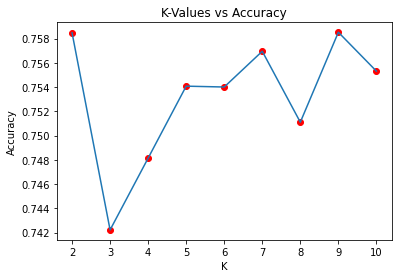

In [180]:
K_values = [i for i in range(2,11)]
plt.scatter(K_values, cross_val_scores, color="red")
plt.plot(K_values, cross_val_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K-Values vs Accuracy")
plt.show()

#### Best Accuracy occurs for K = 6

## Pre Prunning Using Max-Depth

In [181]:
train_accuracy = []
test_accuracy = []

for depth in range(2, 21):
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 20)
    dt_clf.fit(X_train, y_train)
    print("For Depth = ", depth)
    print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt_clf.predict(X_train))*100)
    train_accuracy.append(accuracy_score(y_true=y_train, y_pred=dt_clf.predict(X_train))*100)
    print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=dt_clf.predict(X_test))*100)
    test_accuracy.append(accuracy_score(y_true=y_test, y_pred=dt_clf.predict(X_test))*100)
    print("-----------------------------")
    

For Depth =  2
Accuracy Score on train data:  82.21343873517787
Accuracy Score on test data:  80.4733727810651
-----------------------------
For Depth =  3
Accuracy Score on train data:  84.58498023715416
Accuracy Score on test data:  81.06508875739645
-----------------------------
For Depth =  4
Accuracy Score on train data:  85.57312252964427
Accuracy Score on test data:  78.69822485207101
-----------------------------
For Depth =  5
Accuracy Score on train data:  87.35177865612648
Accuracy Score on test data:  79.88165680473372
-----------------------------
For Depth =  6
Accuracy Score on train data:  89.32806324110672
Accuracy Score on test data:  78.10650887573965
-----------------------------
For Depth =  7
Accuracy Score on train data:  92.09486166007905
Accuracy Score on test data:  78.69822485207101
-----------------------------
For Depth =  8
Accuracy Score on train data:  94.0711462450593
Accuracy Score on test data:  78.69822485207101
-----------------------------
For Dept

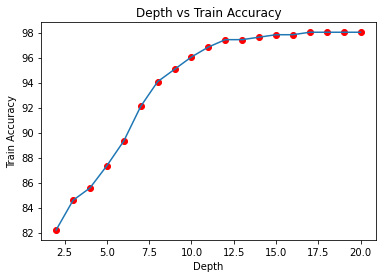

In [182]:
depths = [i for i in range(2, 21)]
plt.scatter(depths, train_accuracy, color="red")
plt.plot(depths, train_accuracy)
plt.xlabel("Depth")
plt.ylabel("Train Accuracy")
plt.title("Depth vs Train Accuracy")
plt.show()

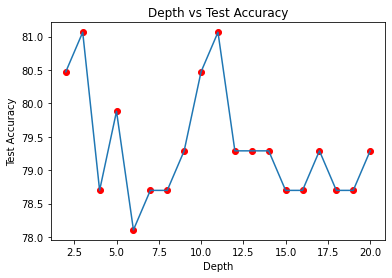

In [183]:
depths = [i for i in range(2, 21)]
plt.scatter(depths, test_accuracy, color="red")
plt.plot(depths, test_accuracy)
plt.xlabel("Depth")
plt.ylabel("Test Accuracy")
plt.title("Depth vs Test Accuracy")
plt.show()

In [184]:
##taking max_depth as 3

dt_clf = DecisionTreeClassifier(max_depth = 3, random_state = 20)
dt_clf.fit(X_train, y_train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=dt_clf.predict(X_train))*100)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=dt_clf.predict(X_test))*100)

Accuracy Score on train data:  84.58498023715416
Accuracy Score on test data:  81.06508875739645


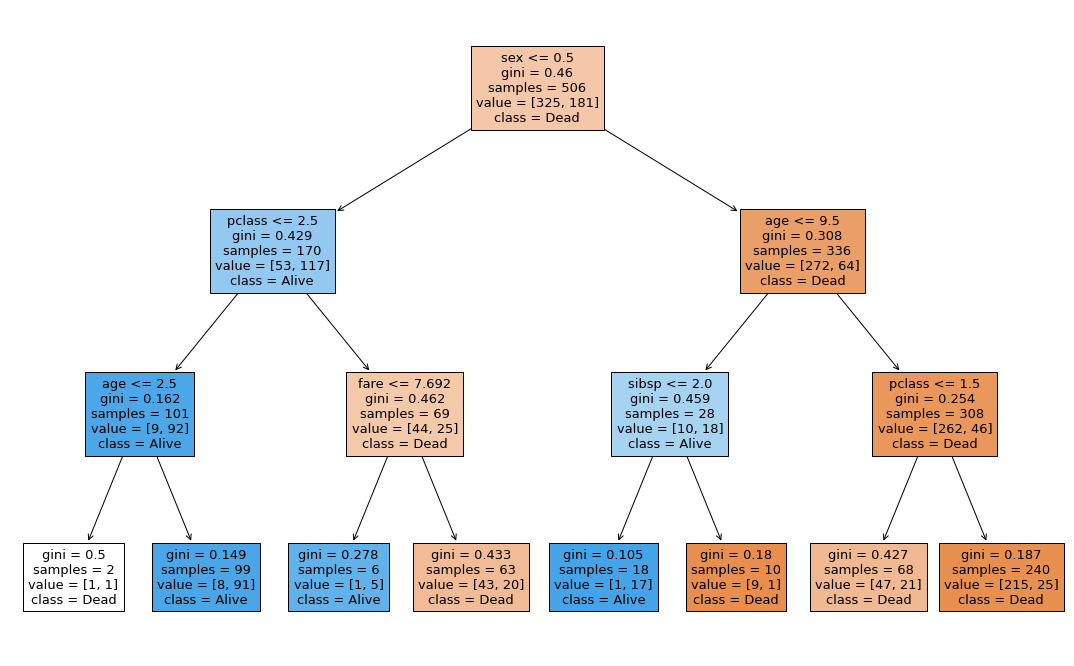

In [185]:
#visualize

from sklearn.tree import plot_tree
plt.figure(figsize=(19,12))
features = ["pclass","sex","age","sibsp","parch","fare"]
classes = ["Dead", "Alive"]
plot_tree(dt_clf,feature_names=features,class_names=classes,filled=True)
plt.show()

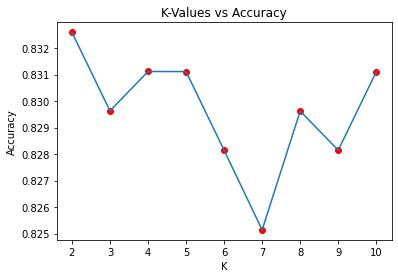

In [186]:
from sklearn.model_selection import cross_val_score
import numpy as np

cross_val_scores = []
for i in range(2, 11):
    scores = cross_val_score(dt_clf, X, Y, cv = i)
    cross_val_scores.append(np.mean(scores))

K_values = [i for i in range(2,11)]
plt.scatter(K_values, cross_val_scores, color="red")
plt.plot(K_values, cross_val_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K-Values vs Accuracy")
plt.show()

#### Best Accuracy for K = 2

## Grid Search

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10, 15, 20, 25],
              "max_depth": [None, 2, 3, 5, 7, 10, 11, 13, 15],
              "min_samples_leaf": [1, 3, 5, 7, 10],
              "max_leaf_nodes": [None, 3, 5, 7, 10, 15, 20]
         }

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=20), params, cv=10, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)


y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)*100

81.06508875739645

In [188]:
print("Best Criterion: ", grid_search_cv.best_estimator_.criterion)
print("\nBest min_samples_split: ", grid_search_cv.best_estimator_.min_samples_split)
print("\nBest max_depth: ", grid_search_cv.best_estimator_.max_depth)
print("\nBest min_samples_leaf: ", grid_search_cv.best_estimator_.min_samples_leaf)
print("\nBest max_leaf_nodes: ", grid_search_cv.best_estimator_.max_leaf_nodes)
print("\nBest max_features: ", grid_search_cv.best_estimator_.max_features)

Best Criterion:  gini

Best min_samples_split:  2

Best max_depth:  3

Best min_samples_leaf:  3

Best max_leaf_nodes:  None

Best max_features:  None


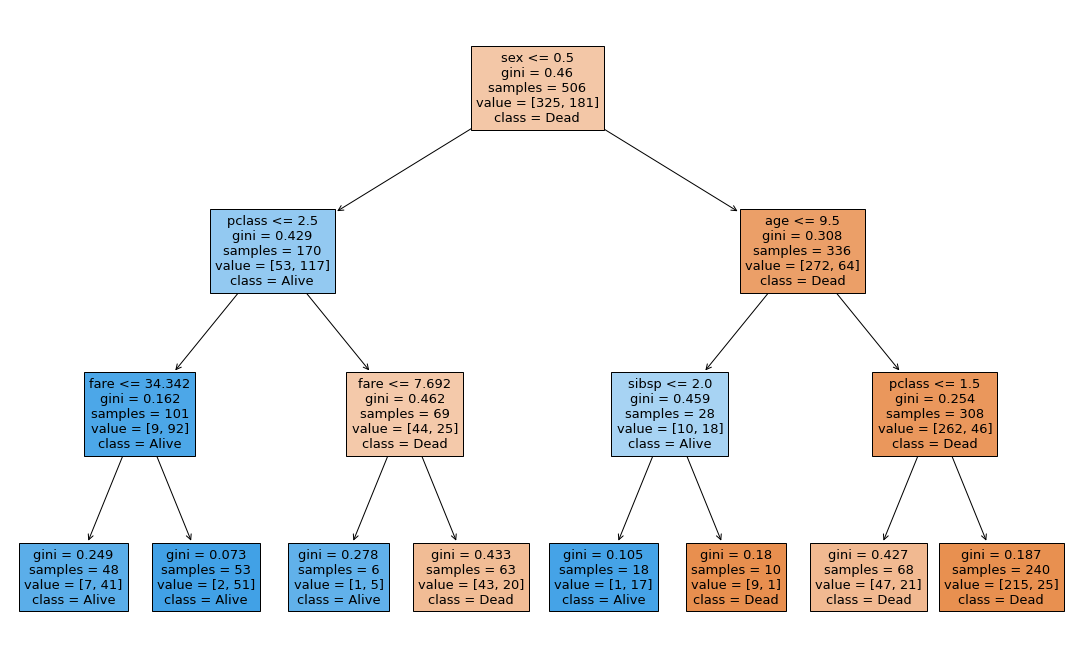

In [189]:
#visualization
dt_clf = DecisionTreeClassifier(criterion = "gini", min_samples_split = 2, max_depth=3, min_samples_leaf=3, 
                                max_leaf_nodes = None, random_state=20)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(19,12))
features = ["pclass","sex","age","sibsp","parch","fare"]
classes = ["Dead", "Alive"]
plot_tree(dt_clf,feature_names=features,class_names=classes,filled=True)
plt.show()

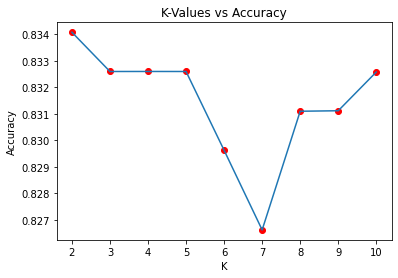

In [190]:
from sklearn.model_selection import cross_val_score
import numpy as np

cross_val_scores = []
for i in range(2, 11):
    scores = cross_val_score(dt_clf, X, Y, cv = i)
    cross_val_scores.append(np.mean(scores))

    
K_values = [i for i in range(2,11)]
plt.scatter(K_values, cross_val_scores, color="red")
plt.plot(K_values, cross_val_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K-Values vs Accuracy")
plt.show()

#### Best Accuracy for K = 2

## Predicting for titanic-test set

In [145]:
df_test = pd.read_csv("titanic_test.csv")
df_test = df_test[["pclass","sex","age","sibsp","parch","fare"]]
df_test.head()

,pclass,sex,age,sibsp,parch,fare
0,1,male,17.0,0,2,110.8833
1,3,male,NaN,0,0,14.5000
2,1,male,31.0,1,0,52.0000
3,3,male,41.0,0,0,7.1250
4,3,male,21.0,0,0,7.8958


In [146]:
df_test.dropna(inplace=True)
le = LabelEncoder()
df_test.sex = le.fit_transform(df_test.sex)#male: 1, female: 0
df_test.head()

,pclass,sex,age,sibsp,parch,fare
0,1,1,17.0000,0,2,110.8833
2,1,1,31.0000,1,0,52.0000
3,3,1,41.0000,0,0,7.1250
4,3,1,21.0000,0,0,7.8958
5,3,1,0.3333,0,2,14.4000


In [147]:
dt_clf.predict(df_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,